In [84]:
import matplotlib as mpl
import json
import sys
import numpy as np
import tables
import os
import matplotlib.pyplot as plt

In [2]:
from dataforge.io import JsonMetaFormat
from dataforge.meta import Meta


In [19]:
from phd.thunderstorm.dwyer_feedback import get_bins_from_center, load_reversed_data, histogrammed_reverse_data_v2
path = "/mnt/storage2/phd/data/thunderstorm/dwyer2003/"

In [6]:
pair = set()
for i in range(0,6):
    path_hdf5 = os.path.join(path, f"diff_{i}.hdf5")
    with tables.open_file(path_hdf5) as h5file:
        for group in h5file.root:
            number = h5file.get_node(group, "number")
            n = number.attrs["values_macros_number"]
            field = number.attrs["values_gdml_fieldValueZ"]
            cell = number.attrs["values_gdml_cellHeight"]
            print(field, number.attrs["values_macros_number"])
            if (field == 5.5e-4 and n ==30):
                print(path_hdf5, group)
            # print(cell, field)
            # pair.add((field, cell))
        
    

0.00055 30
/mnt/storage2/phd/data/thunderstorm/dwyer2003/diff_0.hdf5 /sim0001 (Group) ''
0.001 1
0.0007 1
0.0006 1
0.00055 1
0.0005 1
0.00045 1
0.0004 1
0.001 10
0.0007 10
0.0006 10
0.001 50
0.0007 50
0.001 50
0.0007 50
0.001 50
0.0007 50
0.001 50
0.0007 50
0.001 5
0.0007 5
0.0006 5
0.001 5
0.0007 5
0.0006 5
0.001 5
0.0007 5
0.0006 5
0.001 5
0.0007 5
0.0006 5
0.001 1
0.0007 1
0.0006 1


In [13]:
with tables.open_file("/mnt/storage2/phd/data/thunderstorm/dwyer2003/diff_0.hdf5") as h5file:
    number = h5file.get_node("/sim0001", "number").read()

In [14]:
number

array([(0,   670, 0,   495), (0,   754, 0,   521), (0,   925, 0,   754),
       (0,   327, 0,   471), (0,  8064, 0,  9487), (0,   261, 0,   466),
       (0,   140, 0,   196), (0,  3140, 0,  2765), (0,   586, 0,   607),
       (0,   764, 0,   888), (0,  3572, 0,  3352), (0,  6148, 0,  5445),
       (0,  6040, 0,  6483), (0,  1310, 0,  1317), (0,  3040, 0,  3111),
       (0,  3767, 0,  3802), (0,  6983, 0,  7494), (0,  1102, 0,  1508),
       (0, 13170, 0, 12482), (0,  4288, 0,  3504), (0,  1448, 0,  1446),
       (0,  1084, 0,  1216), (0,  1404, 0,  1200), (0,   358, 0,   286),
       (0,  6762, 0,  7015), (0,   149, 0,    66), (0,   779, 0,   731),
       (0,   203, 0,   192), (0,  9442, 0, 10099), (0,  3773, 0,  4371)],
      dtype=[('Primary', '<i4'), ('Gamma', '<i4'), ('Electron', '<i4'), ('Positron', '<i4')])

In [10]:
with tables.open_file("/mnt/storage2/phd/data/thunderstorm/dwyer2003/diff_0.hdf5") as h5file:
    data_gamma = h5file.get_node("/sim0001", "gamma").read()

In [97]:
with tables.open_file("/mnt/storage2/phd/data/thunderstorm/dwyer2003/diff_0.hdf5") as h5file:
    data_positron = h5file.get_node("/sim0001", "positron").read()

(array([76337.,  7533.,  5992.,  4940.,  4018.,  3463.,  2995.,  1927.,
         1257.,   919.]),
 array([2.14481531e-312, 3.99987900e+001, 7.99975800e+001, 1.19996370e+002,
        1.59995160e+002, 1.99993950e+002, 2.39992740e+002, 2.79991530e+002,
        3.19990320e+002, 3.59989110e+002, 3.99987900e+002]),
 <a list of 10 Patch objects>)

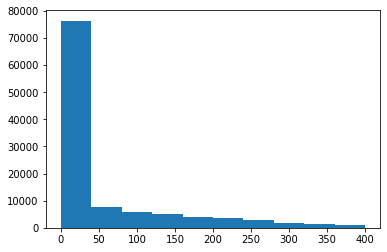

In [12]:
N = 30
indx = data_gamma["z"] < 400
plt.hist(data_gamma["z"][indx])

2174


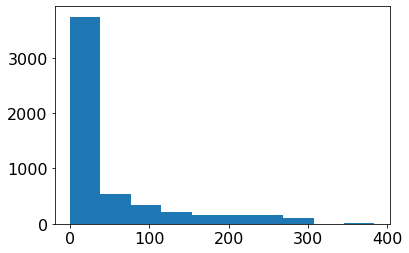

In [99]:
indx = data_positron["z"] < 400
plt.hist(data_positron["z"][indx])

2174


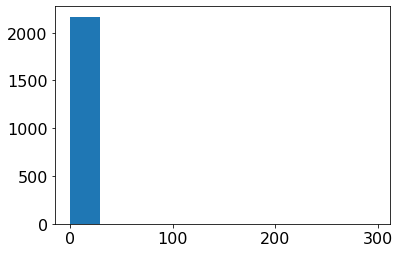

In [102]:
indx = np.logical_and(data_positron["energy"] > 3, data_positron["z"] < 400)
plt.hist(data_positron["z"][indx])
print(indx.sum())

In [30]:
    
def calculate_hist_height(data):
    result, _  = np.histogramdd([data["z"], np.rad2deg(data["theta"]), data["energy"], ], bins=(np.arange(0,401,10), np.arange(-5,96,10), np.arange(0.05, 3.01, 0.05), ))
    return result

In [ ]:
path_reverse = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_v2.hdf5"
reverseHist = histogrammed_reverse_data_v2(path_reverse, 5.5e-4)


In [31]:
histHeight = calculate_hist_height(data_gamma)

In [104]:
histHeightPos = calculate_hist_height(data_positron)

In [32]:
histHeight

array([[[ 22.,  10.,   9., ...,  10.,   9.,   4.],
        [ 56.,   9.,   4., ...,   0.,   0.,   0.],
        [ 92.,  15.,   7., ...,   0.,   0.,   0.],
        ...,
        [165.,  12.,   5., ...,   0.,   0.,   0.],
        [139.,  21.,   2., ...,   0.,   0.,   0.],
        [116.,   5.,   5., ...,   0.,   0.,   0.]],

       [[  5.,   1.,   0., ...,   0.,   0.,   0.],
        [ 38.,   5.,   4., ...,   0.,   0.,   1.],
        [ 65.,  15.,   7., ...,   0.,   0.,   0.],
        ...,
        [128.,   8.,   6., ...,   0.,   0.,   0.],
        [132.,  15.,   3., ...,   0.,   0.,   0.],
        [105.,  13.,   7., ...,   0.,   0.,   0.]],

       [[  3.,   1.,   0., ...,   0.,   0.,   0.],
        [ 44.,  12.,   1., ...,   0.,   0.,   0.],
        [ 55.,  10.,   4., ...,   0.,   0.,   0.],
        ...,
        [107.,  16.,   3., ...,   0.,   0.,   0.],
        [ 93.,   9.,   4., ...,   0.,   0.,   0.],
        [ 87.,   8.,   1., ...,   0.,   1.,   0.]],

       ...,

       [[  0.,   0.,   0

In [33]:
result = []
for item in histHeight:
    temp = np.sum(item*reverseHist.probability)
    result.append(temp)

In [39]:
result = np.array(result)/30

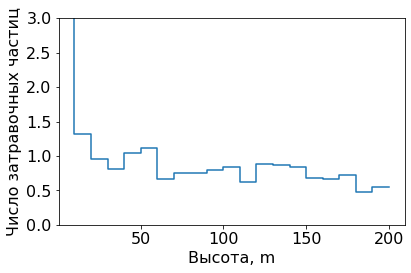

In [109]:
x = np.arange(0,201,10)
x = x[:-1] + np.diff(x)
plt.step(x, result[:x.size])
plt.ylim(0,3)
plt.xlabel("Высота, m")
plt.ylabel("Число затравочных частиц")
plt.tight_layout()
plt.savefig("att_fb_1.png", dpi=600)

In [70]:
mean = np.sum(result[:x.size]*x)/np.sum(result)
print(mean)

53.43264577155015


In [85]:
mpl.rcParams.update(
    {'font.family': 'sans-serif',
     'font.size': 16,
     'axes.labelsize': 16,
     'xtick.labelsize': 16,
     'ytick.labelsize': 16,
     'legend.fontsize': 16})

63.45005746394875
43.35949033385806
28.17742513175135
19.755716924793408
15.248855465073046


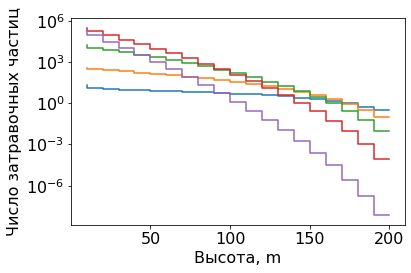

In [96]:
x = np.arange(0,201,10)
x = x[:-1] + np.diff(x)
gamma = result[:x.size][::-1]
for i in range(5):
    temp = np.zeros(gamma.size)
    for indx, it in enumerate(gamma):
        if indx ==0:
            temp = it*gamma
        else:
            temp[indx:] += it*gamma[:-indx]
    plt.step(x, temp[::-1])
    plt.yscale("log")
    gamma = temp    
    print(np.sum(temp[::-1]*x)/np.sum(temp))
plt.xlabel("Высота, m")
plt.ylabel("Число затравочных частиц")
plt.tight_layout()
plt.savefig("att_fb_2.png", dpi=600)

array([0.])

In [105]:
result_pos = []
for item in histHeightPos:
    temp = np.sum(item*reverseHist.probability)
    result_pos.append(temp)
result_pos = np.array(result_pos)/30

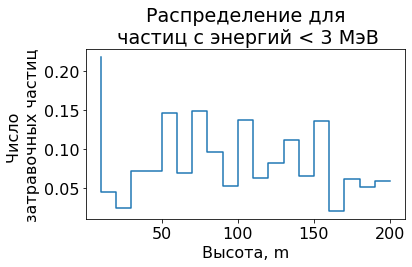

In [113]:
x = np.arange(0,201,10)
x = x[:-1] + np.diff(x)
plt.step(x, result_pos[:x.size])
# plt.ylim(0,3)
plt.xlabel("Высота, m")
plt.ylabel("Число \nзатравочных частиц")
plt.title("Распределение для\n частиц с энергий < 3 МэВ")
plt.tight_layout()
plt.savefig("att_fb_3.png", dpi=600)
